In [4]:
from __future__ import division, print_function, unicode_literals 
import numpy as np  
import matplotlib.pyplot as plt 
np.random.seed(2) 
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

# extended data by adding a column of 1s (x_0 = 1) 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
print(X.shape)

(2, 20)


 In dữ liệu ra màn hình để hình dung trực quan 

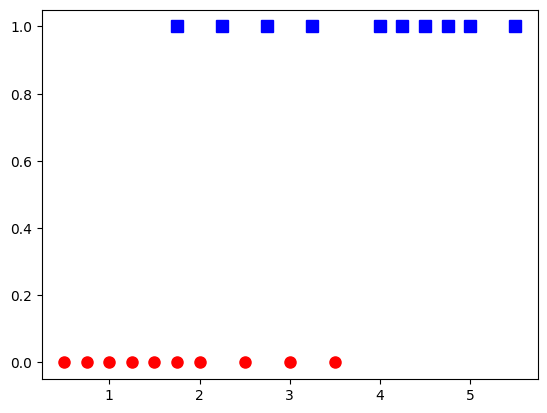

In [34]:
X0 = X[1, np.where(y == 0)][0] 
y0 = y[np.where(y == 0)] 
X1 = X[1, np.where(y == 1)][0] 
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro', markersize = 8) 
plt.plot(X1, y1, 'bs', markersize = 8) 
plt.show() 

Xây dựng các phương thức cần cho mô hình Hồi quy Logistic gồm: Hàm sigmoid (logistic) tính g(z)  và hàm 
hồi quy logistic  

In [52]:
def sigmoid(s): 
    return 1/(1 + np.exp(-s)) 
 
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000): 
# method to calculate model logistic regression by Stochastic Gradient Descent method 
# eta: learning rate; tol: tolerance; max_count: maximum iterates 
    w = [w_init]     
    it = 0 
    N = X.shape[1] 
    d = X.shape[0] 
    count = 0 
    check_w_after = 20 
# loop of stochastic gradient descent  
    while count < max_count: 
        # shuffle the order of data (for stochastic gradient descent).  
        # and put into mix_id  
        mix_id = np.random.permutation(N) 
        for i in mix_id: 
            xi = X[:, i].reshape(d, 1) 
            yi = y[i] 
            zi = sigmoid(np.dot(w[-1].T, xi)) 
            w_new = w[-1] + eta*(yi - zi)*xi 
            count += 1 
            # stopping criteria 
            if count%check_w_after == 0:                 
                if np.linalg.norm(w_new - w[-check_w_after]) < tol: 
                    return w 
            w.append(w_new) 
    return w

In ra kết quả (bộ hệ số w) 

In [53]:
eta = .05  
d = X.shape[0] 
w_init = np.random.randn(d, 1) 
 
w = logistic_sigmoid_regression(X, y, w_init, eta) 
print(w[-1]) 

[[-4.092695  ]
 [ 1.55277242]]


In ra xác suất rơi vào lớp 1 (qua) của các phần tử dữ liệu trong tập training: 

In [42]:
sigmoid_outputs = sigmoid(np.dot(w[-1].T, X))
print(sigmoid_outputs)
# Phân loại các giá trị
classified_values = np.where(sigmoid_outputs >= 0.5, 1, 0)

print(classified_values)

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]
[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]]


In kết quả trực quan 

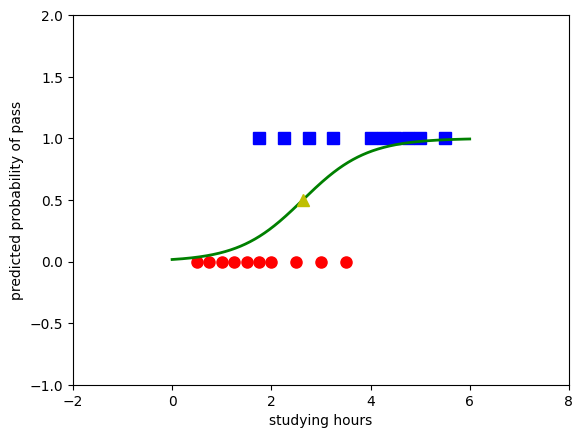

In [7]:
X0 = X[1, np.where(y == 0)][0] 
y0 = y[np.where(y == 0)] 
X1 = X[1, np.where(y == 1)][0] 
y1 = y[np.where(y == 1)] 
 
plt.plot(X0, y0, 'ro', markersize = 8) 
plt.plot(X1, y1, 'bs', markersize = 8) 
 
xx = np.linspace(0, 6, 1000) 
w0 = w[-1][0][0] 
w1 = w[-1][1][0] 
threshold = -w0/w1 
yy = sigmoid(w0 + w1*xx) 
plt.axis([-2, 8, -1, 2]) 
plt.plot(xx, yy, 'g-', linewidth = 2) 
plt.plot(threshold, .5, 'y^', markersize = 8) 
plt.xlabel('studying hours') 
plt.ylabel('predicted probability of pass') 
plt.show() 

Hãy thực hiện lệnh để thu được bộ hệ số, quan sát kết quả chạy và dùng bộ hệ số thu được để chạy dự đoán cho kết 
quả thi của các sinh viên với số giờ học sau 
Student  ID 21      22      23      24      25 
Hours       2.45    1.85    3.75    3.21    4.05 

In [56]:
X_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
X_test = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis = 0)

sigmoid_outputs = sigmoid(np.dot(w[-1].T, X_test))
print(sigmoid_outputs)
classified_values = np.where(sigmoid_outputs >= 0.5, 1, 0)

print(classified_values)

[[0.42839499 0.22792483 0.8494382  0.70924179 0.89989273]]
[[0 0 1 1 1]]


In [10]:
# Sử dụng thư viện scikit-learn 
from sklearn import linear_model 
logReg = linear_model.LogisticRegression(penalty=None) 
# Training & compute weights w 
np.random.seed(2) 
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
logReg.fit(X.T, y)
# For new data X_test, predict 
X_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
X_test = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis = 0)
predict = logReg.predict(X_test.T) 
print(predict)
# For showing of w 
print(logReg.coef_)

[0 0 1 1 1]
[[-2.03966076  1.5051666 ]]
